## CO Potential

In [4]:
import numpy as np
import psi4
from matplotlib import pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

In [5]:
### template for the z-matrix
mol_tmpl = """C
O 1 **R**"""

In [6]:
''' create arrays in this cell! '''
### We will probably forget about the molecules array, so let's have it pre-declared!
molecules = []
r_array=[0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.25, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5,]
RHF_E_array=[]
MP2_E_array=[]
CCSD_E_array=[]


In [7]:
### loop over the different bond-lengths, create different instances
### of HF molecule
for r in r_array:
    molecule = psi4.geometry(mol_tmpl.replace("**R**", str(r)))
    molecules.append(molecule)
    
### loop over instances of molecules, compute the RHF, MP2, and CCSD
### energies and store them in their respective arrays
for mol in molecules:
    energy = psi4.energy("SCF/cc-pVTZ", molecule=mol)
    RHF_E_array.append(energy)
    energy = psi4.energy("MP2/cc-pVTZ", molecule=mol)
    MP2_E_array.append(energy)
    energy = psi4.energy("CCSD/cc-pVTZ",molecule=mol)
    CCSD_E_array.append(energy)


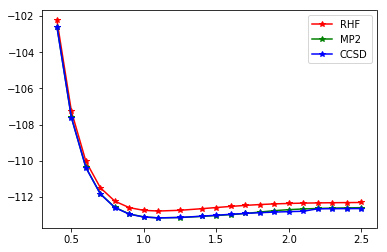

In [8]:
plt.plot(r_array, RHF_E_array, '-r*', label='RHF')
plt.plot(r_array, MP2_E_array, '-g*', label='MP2')
plt.plot(r_array, CCSD_E_array, '-b*', label='CCSD')
plt.legend()
plt.show()

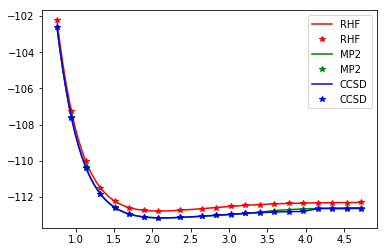

In [9]:
r_array_au=[]
for r in r_array:
    r_array_au.append(r*1.89)

###RHF Spline
RHF_E_Spline=InterpolatedUnivariateSpline(r_array_au, RHF_E_array, k=3)
###MP2 Spline
MP2_E_Spline=InterpolatedUnivariateSpline(r_array_au, MP2_E_array, k=3)
###CCSD Spline
CCSD_E_Spline=InterpolatedUnivariateSpline(r_array_au, CCSD_E_array, k=3)

### form a much finer grid to evaluate spline object at
r_fine = np.linspace(0.4*1.89,2.5*1.89,200)

### compute the interpolated/extrapolated values for RHF Energy on this grid
RHF_E_fine = RHF_E_Spline(r_fine)

### compute the interpolated/extrapolated values for RHF Energy on this grid
MP2_E_fine = MP2_E_Spline(r_fine)

### compute the interpolated/extrapolated values for RHF Energy on this grid
CCSD_E_fine = CCSD_E_Spline(r_fine)


### plot the interpolated data with lines against computed data in *'s
plt.plot(r_fine, RHF_E_fine, 'red', r_array_au, RHF_E_array, 'r*', label='RHF')
plt.plot(r_fine, MP2_E_fine, 'green', r_array_au, MP2_E_array, 'g*', label='MP2')
plt.plot(r_fine, CCSD_E_fine, 'blue', r_array_au, CCSD_E_array, 'b*', label='CCSD')
plt.legend()
plt.show()


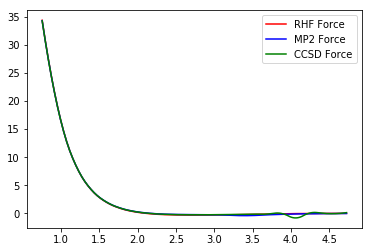

In [32]:
RHF_Force_Spline=RHF_E_Spline.derivative()
MP2_Force_Spline=MP2_E_Spline.derivative()
CCSD_Force_Spline=CCSD_E_Spline.derivative()

RHF_Force_fine=-1*RHF_Force_Spline(r_fine)
MP2_Force_fine=-1*MP2_Force_Spline(r_fine)
CCSD_Force_fine=-1*CCSD_Force_Spline(r_fine)

plt.plot(r_fine, RHF_Force_fine, 'red', label='RHF Force')
plt.plot(r_fine, MP2_Force_fine, 'blue', label='MP2 Force')
plt.plot(r_fine, CCSD_Force_fine, 'green', label='CCSD Force')
plt.legend()
plt.show()

In [33]:
### Find Equilibrium Bond-Lengths for each level of theory
RHF_Req_idx = np.argmin(RHF_E_fine)
MP2_Req_idx = np.argmin(MP2_E_fine)
CCSD_Req_idx = np.argmin(CCSD_E_fine)

### find the value of the separation corresponding to that index
RHF_Req = r_fine[RHF_Req_idx]
MP2_Req = r_fine[MP2_Req_idx]
CCSD_Req = r_fine[CCSD_Req_idx]

### print equilibrium bond-lengths at each level of theory!
print("Equilibrium bond length at RHF/cc-pVDZ level is ",RHF_Req, "atomic units")
print("Equilibrium bond length at MP2/cc-pVDZ level is ",MP2_Req, "atomic units")
print("Equilibrium bond lengthat CCSD/cc-pVDZ level is ",CCSD_Req, "atomic units")

print("RHF_Req is", RHF_Req/1.89, "angstroms")
print("MP2_Req is", MP2_Req/1.89, "angstroms")
print("CCSD_Req is", CCSD_Req/1.89, "angstroms")

mO=29384.
mC=22038.
mu=mO*mC/(mO+mC)
print(mu)

Equilibrium bond length at RHF/cc-pVDZ level is  2.09229648241206 atomic units
Equilibrium bond length at MP2/cc-pVDZ level is  2.1521306532663314 atomic units
Equilibrium bond lengthat CCSD/cc-pVDZ level is  2.132185929648241 atomic units
RHF_Req is 1.1070351758793968 angstroms
MP2_Req is 1.1386934673366833 angstroms
CCSD_Req is 1.1281407035175879 angstroms
12593.142857142857


In [34]:
RHF_Curvature_Spline=RHF_Force_Spline.derivative()
MP2_Curvature_Spline=MP2_Force_Spline.derivative()
CCSD_Curvature_Spline=CCSD_Force_Spline.derivative()

RHF_Force_Constant=RHF_Curvature_Spline(RHF_Req)
MP2_Force_Constant=MP2_Curvature_Spline(MP2_Req)
CCSD_Force_Constant=CCSD_Curvature_Spline(CCSD_Req)

print("RHF Force Constant is", RHF_Force_Constant)
print("MP2 Force Constant is", MP2_Force_Constant)
print("CCSD Force Constant is", CCSD_Force_Constant)

nu_RHF=1/(2*np.pi)*np.sqrt(RHF_Force_Constant/mu)
nu_MP2=1/(2*np.pi)*np.sqrt(MP2_Force_Constant/mu)
nu_CCSD=1/(2*np.pi)*np.sqrt(CCSD_Force_Constant/mu)

nu_RHF_SI=2*np.pi*nu_RHF*27.211
nu_MP2_SI=2*np.pi*nu_MP2*27.211
nu_CCSD_SI=2*np.pi*nu_CCSD*27.211

print("RHF Frequency is", nu_RHF_SI, "eV")
print("MP2 Frequency is", nu_MP2_SI, "eV")
print("CCSD Frequency is", nu_CCSD_SI, "eV")

RHF Force Constant is 1.446363126810578
MP2 Force Constant is 1.1799367467222925
CCSD Force Constant is 1.2820229915960264
RHF Frequency is 0.2916191958525529 eV
MP2 Frequency is 0.2633945597175536 eV
CCSD Frequency is 0.274552463071945 eV


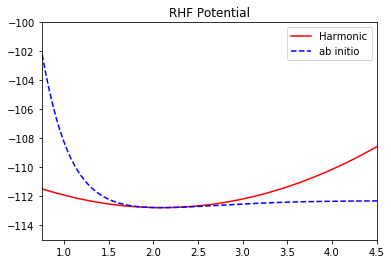

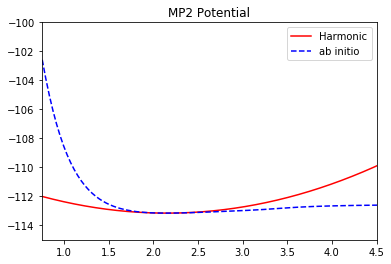

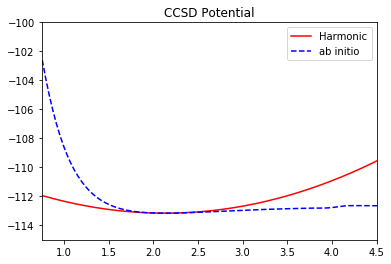

In [13]:
RHF_Harm_Pot=0.5*RHF_Force_Constant*(r_fine-RHF_Req)**2+RHF_E_Spline(RHF_Req)
MP2_Harm_Pot=0.5*MP2_Force_Constant*(r_fine-MP2_Req)**2+MP2_E_Spline(MP2_Req)
CCSD_Harm_Pot=0.5*CCSD_Force_Constant*(r_fine-CCSD_Req)**2+CCSD_E_Spline(CCSD_Req)

plt.plot(r_fine, RHF_Harm_Pot, 'red', label='Harmonic')
plt.plot(r_fine, RHF_E_fine, 'b--', label='ab initio' )
### these limits were chosen to zoom in on region of the RHF PES that is approximately
### harmonic
plt.xlim(0.75, 4.5)
plt.ylim(-115.0,-100)
plt.legend()
plt.title("RHF Potential")
plt.show()

plt.plot(r_fine, MP2_Harm_Pot, 'red', label='Harmonic')
plt.plot(r_fine, MP2_E_fine, 'b--', label='ab initio' )
plt.xlim(0.75, 4.5)
plt.ylim(-115.0,-100)
plt.legend()
plt.title("MP2 Potential")
plt.show()

plt.plot(r_fine, CCSD_Harm_Pot, 'red', label='Harmonic')
plt.plot(r_fine, CCSD_E_fine, 'b--', label='ab initio' )
plt.xlim(0.75, 4.5)
plt.ylim(-115.0,-100)
plt.legend()
plt.title("CCSD Potential")
plt.show()

In [14]:
def Velocity_Verlet(r_curr, v_curr, mu, force_spline,dt):
    a_curr=-1*force_spline(r_curr)/mu
    r_new=r_curr+v_curr*dt+0.5*a_curr*dt**2
    a_new=-1*force_spline(r_new)/mu
    v_new=v_curr+0.5*(a_curr+a_new)*dt
    return [r_new, v_new]

In [15]:
def harmonic_position(om, amp, phase, req, t):
    return amp*np.sin(om*t+phase)+req

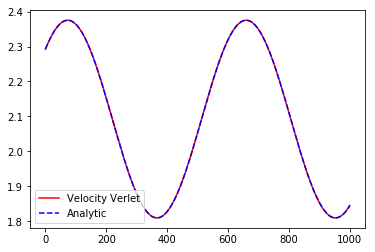

In [18]:
### how many updates do you want to perform?
N_updates = 10000

### establish time-step for integration to be 0.02 atomic units... this is about 0.0005 femtoseconds
### so total time is 200000*0.02 atomic units of time which is ~9.6e-13 s, or 960 fs
dt = 0.1

### results from VV algorithm
hr_vs_t = np.zeros(N_updates)
hv_vs_t = np.zeros(N_updates)
### analytic result for r(t)
ar_vs_t = np.zeros(N_updates)
### array to store time in atomic units
t_array = np.zeros(N_updates)

### establish some constants relevant for analytic solution
### harmonic freq
om = np.sqrt(RHF_Force_Constant/mu)
### initial displacement 
x0 = 0.2
### amplitude for analytic solution
Amp = x0/(np.sin(np.pi/4))
### initial velocity
v0 = Amp * om * np.cos(np.pi/4)

hr_vs_t[0] = RHF_Req+x0
hv_vs_t[0] = v0

### We need a spline object for the harmonic force to pass to the Velocity Verlet algorithm,
### let's get that now!

### spline for Harmonic potential using RHF_k
RHF_Harm_Pot_Spline = InterpolatedUnivariateSpline(r_fine, RHF_Harm_Pot, k=3)
### RHF harmonic force
RHF_Harm_Force = RHF_Harm_Pot_Spline.derivative()


### first Velocity Verlet update
result_array = Velocity_Verlet(hr_vs_t[0], hv_vs_t[0], mu, RHF_Harm_Force, dt)
### first analytic result
ar_vs_t[0] = harmonic_position(om, Amp, np.pi/4, RHF_Req, 0)
### do the update N_update-1 more times
for i in range(1,N_updates):
    ### store current time
    t_array[i] = dt*i
    ### Compute VV update
    result_array = Velocity_Verlet(result_array[0], result_array[1], mu, RHF_Harm_Force, dt)
    ### store results from VV update
    hr_vs_t[i] = result_array[0]
    hv_vs_t[i] = result_array[1]
    ### compute and store results from analytic solution
    ar_vs_t[i] = harmonic_position(om, Amp, np.pi/4, RHF_Req, dt*i)

### Plot result and compare!
plt.plot(t_array, hr_vs_t, 'red', label="Velocity Verlet")
plt.plot(t_array, ar_vs_t, 'b--', label="Analytic")
plt.legend()
plt.show()

In [30]:
rvals=r_array[6:16]
energies=CCSD_E_array[6:16]
data=psi4.diatomic.anharmonicity(rvals, energies)

In [31]:
data

{'re': 1.129346261543152,
 'r0': 1.1308891832679242,
 'we': 2269.0002020552606,
 'wexe': 11.502114050346403,
 'nu': 2245.995973954568,
 'ZPVE(harmonic)': 1131.6245725150436,
 'ZPVE(anharmonic)': 1131.6245725150436,
 'Be': 1.9277833915133136,
 'B0': 1.9225266610496756,
 'ae': 0.010513460927276029,
 'De': 5.5662873886258065e-06}